(200,)


<ipython-input-539-eb60adc1a919>:185: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-539-eb60adc1a919>:199: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-539-eb60adc1a919>:213: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-539-eb60adc1a919>:227: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-539-eb60adc1a919>:241: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


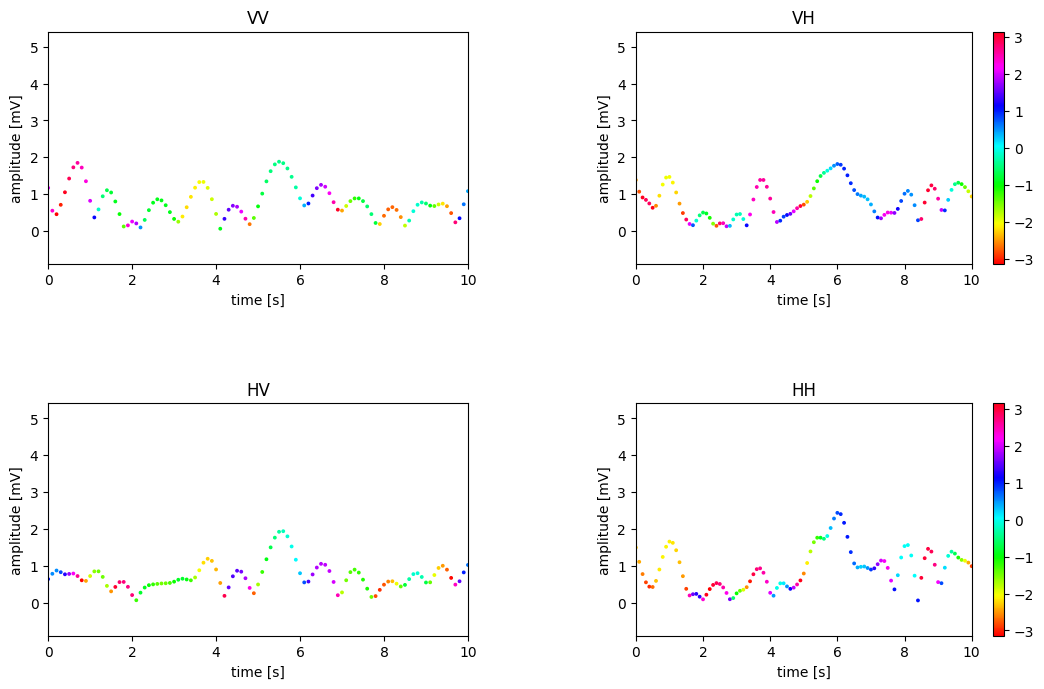

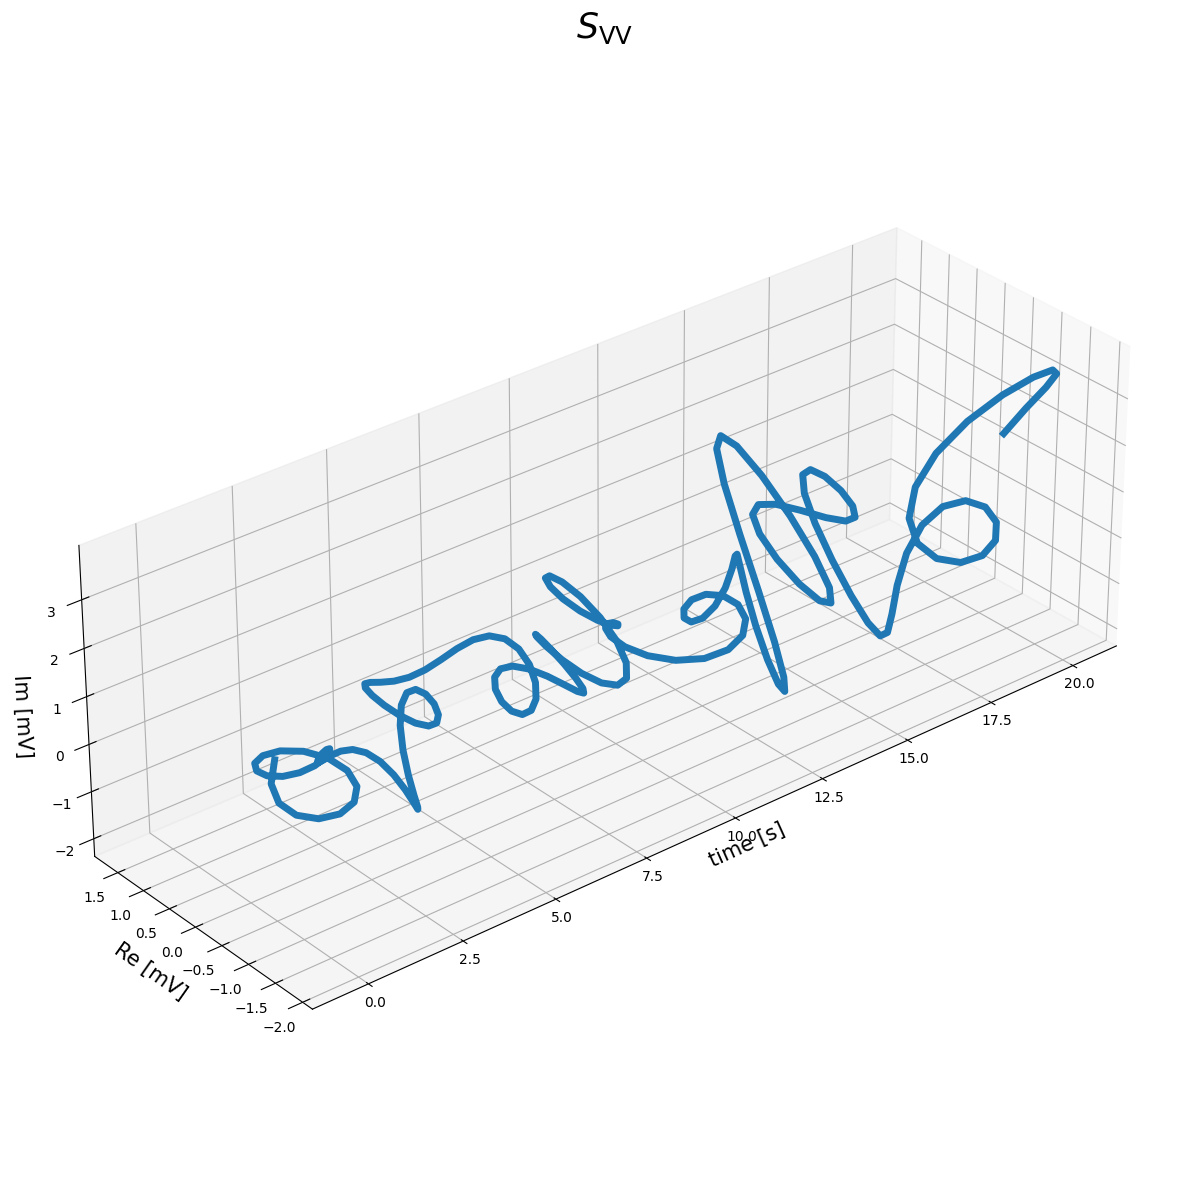

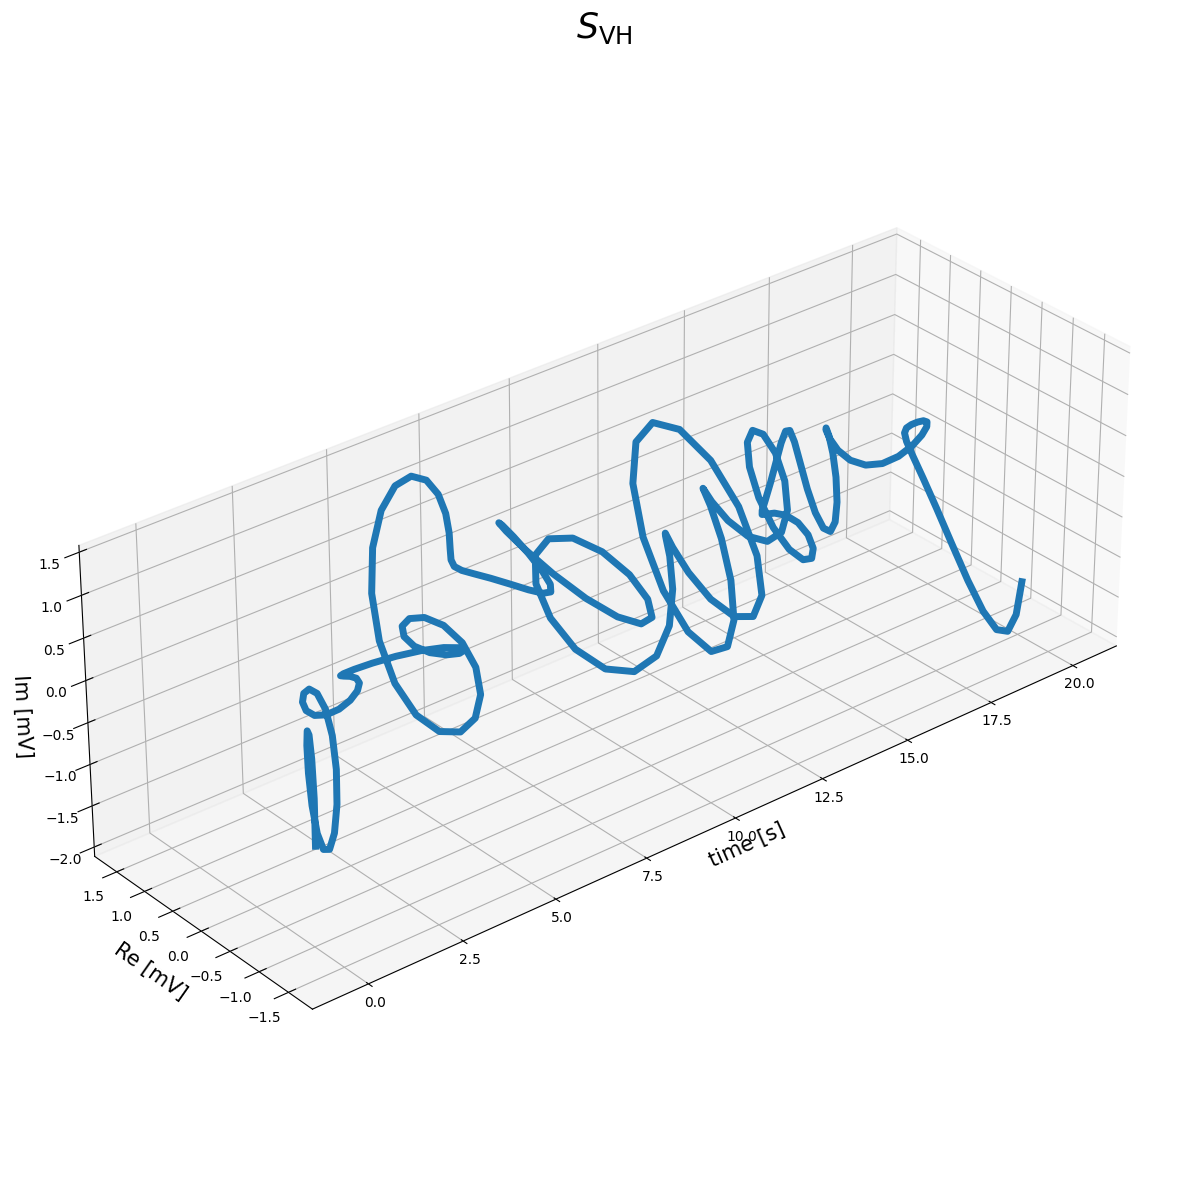

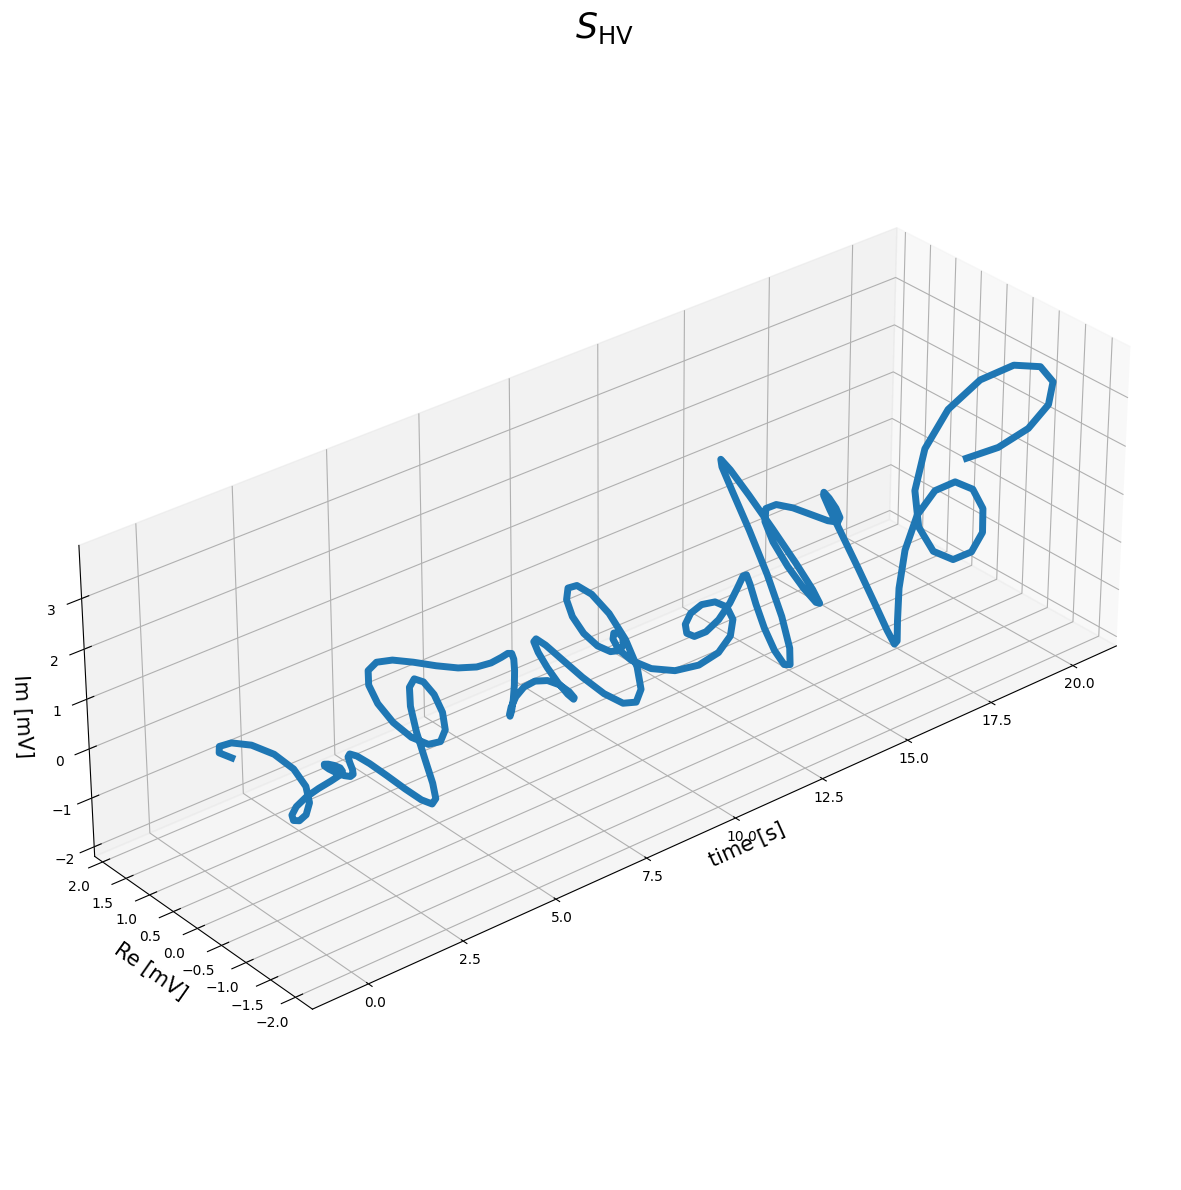

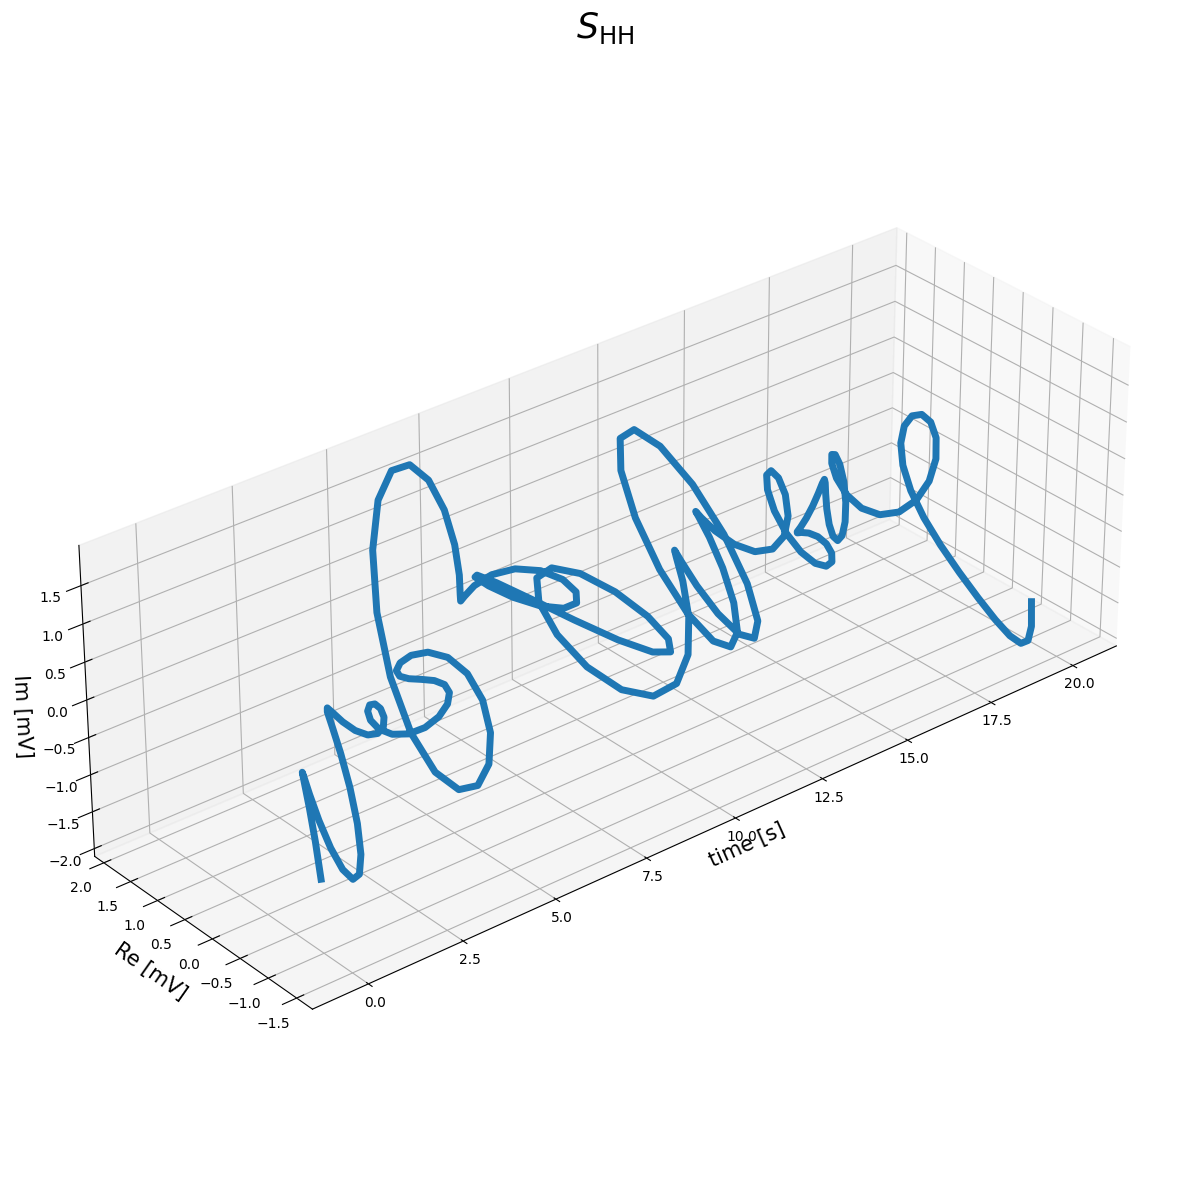

In [539]:
import numpy as np
import matplotlib.pyplot as plt
import os

f = "../data/20230203_standing_4.dat"
df = np.genfromtxt(os.path.join(f), delimiter=",")
df = (df-2048)/2048*100 #DA変換 [mV]

#N = df.shape[0]           # サンプル数
N=400
freq = 20 # 周波数
tmax = N/freq #計測時間
# データのパラメータ

dt = 1/freq          # サンプリング間隔
fc = 2  # カットオフ周波数
t = np.arange(0, N*dt, dt)  # 時間軸
fq = np.linspace(0, 1.0/dt, N//2)  # 周波数軸

# Tx1-Rx1 Svv=I1+jQ1
I1 = df[0:N:2, 0]
Q1 = df[0:N:2, 1]
#A1 = np.sqrt((I1 **2 + Q1 ** 2))
#P1=(np.arctan2(Q1,I1))
# Tx1-Rx2 Svh=I2+jQ2
I2 = df[0:N:2, 2]
Q2 = df[0:N:2, 3]
#A2 = np.sqrt((I2 ** 2 + Q2 ** 2))
#P2=(np.arctan2(Q2,I2))
# Tx2-Rx1 Shv=I3+jQ3
I3 = df[1:N:2, 0]
Q3 = df[1:N:2, 1]
#A3 = np.sqrt((I3 ** 2 + Q3 ** 2))
#P3=(np.arctan2(Q3,I3))
# Tx2-Rx2 Shh=I4+jQ4
I4 = df[1:N:2, 2]
Q4 = df[1:N:2, 3]
#A4 = np.sqrt((I4 ** 2 + Q4 ** 2))
#P4=(np.arctan2(Q4,I4))

# 高速フーリエ変換（周波数信号に変換）
F1 = np.fft.fft(I1)
F2 = np.fft.fft(I2)
F3 = np.fft.fft(I3)
F4 = np.fft.fft(I4)
G1 = np.fft.fft(Q1) 
G2 = np.fft.fft(Q2)
G3 = np.fft.fft(Q3)
G4 = np.fft.fft(Q4)

# 正規化 + 交流成分2倍
F1 = F1/(N/2/2)
F1[0] = F1[0]/2
F2 = F2/(N/2/2)
F2[0] = F2[0]/2
F3 = F3/(N/2/2)
F3[0] = F3[0]/2
F4 = F4/(N/2/2)
F4[0] = F4[0]/2
G1 = G1/(N/2/2)
G1[0] = G1[0]/2
G2 = G2/(N/2/2)
G2[0] = G2[0]/2
G3 = G3/(N/2/2)
G3[0] = G3[0]/2
G4 = G4/(N/2/2)
G4[0] = G4[0]/2

# 配列Fをコピー
FF1 = F1.copy()
FF2 = F2.copy()
FF3 = F3.copy()
FF4 = F4.copy()
GG1 = G1.copy()
GG2 = G2.copy()
GG3 = G3.copy()
GG4 = G4.copy()

print(FF1.shape)
# ローパスフィル処理（カットオフ周波数を超える帯域の周波数信号を0にする)
FF1[(fq > fc)] = 0
FF2[(fq > fc)] = 0
FF3[(fq > fc)] = 0
FF4[(fq > fc)] = 0
GG1[(fq > fc)] = 0
GG2[(fq > fc)] = 0
GG3[(fq > fc)] = 0
GG4[(fq > fc)] = 0
#F2[(freq == 0)] = 0 

# 高速逆フーリエ変換（時間信号に戻す）
f1 = np.fft.ifft(FF1)
f2 = np.fft.ifft(FF2)
f3 = np.fft.ifft(FF3)
f4 = np.fft.ifft(FF4)
g1 = np.fft.ifft(GG1)
g2 = np.fft.ifft(GG2)
g3 = np.fft.ifft(GG3)
g4 = np.fft.ifft(GG4)

# 振幅を元のスケールに戻す
f1 = np.real(f1*N)
f2 = np.real(f2*N)
f3 = np.real(f3*N)
f4 = np.real(f4*N)
g1 = np.real(g1*N)
g2 = np.real(g2*N)
g3 = np.real(g3*N)
g4 = np.real(g4*N)

I1 = f1 - np.mean(f1)
I2 = f2 - np.mean(f2)
I3 = f3 - np.mean(f3)
I4 = f4 - np.mean(f4)
Q1 = g1 - np.mean(g1)
Q2 = g2 - np.mean(g2)
Q3 = g3 - np.mean(g3)
Q4 = g4 - np.mean(g4)

A1 = np.sqrt((I1 **2 + Q1 ** 2))
P1=(np.arctan2(Q1,I1))
A2 = np.sqrt((I2 ** 2 + Q2 ** 2))
P2=(np.arctan2(Q2,I2))
A3 = np.sqrt((I3 ** 2 + Q3 ** 2))
P3=(np.arctan2(Q3,I3))
A4 = np.sqrt((I4 ** 2 + Q4 ** 2))
P4=(np.arctan2(Q4,I4))

vmax = max(A1.max(),A2.max(),A3.max(),A4.max())
vmin = max(A1.min(),A2.min(),A3.min(),A4.min())

t1= np.arange(0,np.size(A1))/freq*2
t2= np.arange(0,np.size(A3))/freq*2


fig = plt.figure(figsize=(13, 8),dpi=100)  # Figureを設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)
#Tx1-Rx1
ax1 = fig.add_subplot(2, 2, 1)   #1行4列の1番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax1.scatter(t1, A1, c=P1, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
#fig.colorbar(mappable, ax=ax1 ) # カラーバーを付加
plt.title("VV",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,10)
plt.ylim(vmin-1,vmax+1)

#Tx1-Rx2
ax2 = fig.add_subplot(2, 2, 2)   #1行4列の2番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax2.scatter(t1, A2, c=P2, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
fig.colorbar(mappable, ax=ax2 ) # カラーバーを付加
plt.title("VH",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,10)
plt.ylim(vmin-1,vmax+1)

#Tx2-Rx1
ax3 = fig.add_subplot(2, 2, 3)   #1行4列の3番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax3.scatter(t2, A3, c=P3, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
#fig.colorbar(mappable, ax=ax2 ) # カラーバーを付加
plt.title("HV",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,10)
plt.ylim(vmin-1,vmax+1)

#Tx2-Rx2
ax4 = fig.add_subplot(2, 2, 4)   #1行4列の4番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax4.scatter(t2, A4, c=P4, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
fig.colorbar(mappable, ax=ax4 ) # カラーバーを付加
plt.title("HH",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,10)
plt.ylim(vmin-1,vmax+1)

savename = os.path.basename(f).strip('.dat').strip('../data/')

plt.savefig(os.path.join("../img", savename+"_AmPh_"+str(freq)+"Hz_x"))
plt.show()

fig1 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax1 = fig1.add_subplot(projection="3d")
ax1.view_init(elev=30, azim=-130)
ax1.set_box_aspect((3,1,1))
ax1.set_title("$S_\mathrm{VV}$",size = 25)
ax1.set_xlabel("time [s]",size=15)
ax1.set_ylabel("Re [mV]",size=15)
ax1.set_zlabel("Im [mV]",size=15)
ax1.plot(t1,I1,Q1,lw=5)
#ax1.scatter(I1,Q1,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join("../img", savename+"_Svv_x"))
plt.show()

fig2 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax2 = fig2.add_subplot(projection="3d")
ax2.view_init(elev=30, azim=-130)
ax2.set_box_aspect((3,1,1))
ax2.set_title("$S_\mathrm{VH}$",size = 25)
ax2.set_xlabel("time [s]",size=15)
ax2.set_ylabel("Re [mV]",size=15)
ax2.set_zlabel("Im [mV]",size=15)
ax2.plot(t1,I2,Q2,lw=5)
#ax2.scatter(I2,Q2,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join("../img", savename+"_Svh_x"))
plt.show()

fig3 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax3 = fig3.add_subplot(projection="3d")
ax3.view_init(elev=30, azim=-130)
ax3.set_box_aspect((3,1,1))
ax3.set_title("$S_\mathrm{HV}$", size = 25)
ax3.set_xlabel("time [s]",size=15)
ax3.set_ylabel("Re [mV]",size=15)
ax3.set_zlabel("Im [mV]",size=15)
ax3.plot(t2,I3,Q3,lw=5)
#ax3.scatter(I3,Q3,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join("../img", savename+"_Shv_x"))
plt.show()

fig4 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax4 = fig4.add_subplot(projection="3d")
ax4.view_init(elev=30, azim=-130)
ax4.set_box_aspect((3,1,1))
ax4.set_title("$S_\mathrm{HH}$",size = 25)
ax4.set_xlabel("time [s]",size=15)
ax4.set_ylabel("Re [mV]",size=15)
ax4.set_zlabel("Im [mV]",size=15)
ax4.plot(t2,I4,Q4,lw=5)
#ax4.scatter(I4,Q4,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join("../img", savename+"_Shh_x"))
plt.show()

<ipython-input-541-2711758be72a>:176: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


finished


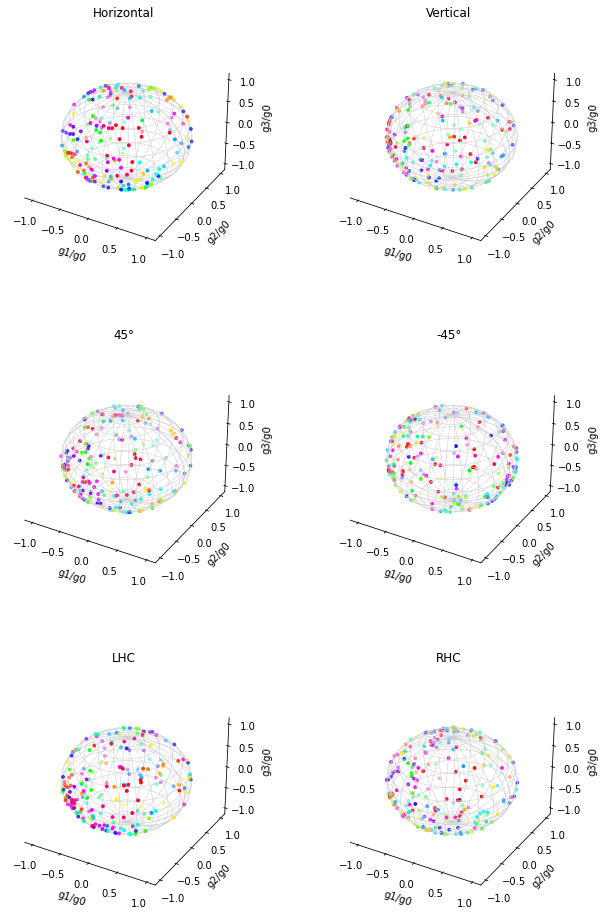

In [541]:

#送信-水平偏波
g0 = (A4**2)+(A3**2) # |Shh|^2+|Svh|^2
g1 = (A4**2)-(A3**2) # |Shh|^2-|Svh|^2
g2= 2*(I3*I4+Q3*Q4)  # 2Re(Shh`*Svh)
g3= 2*(I4*Q3-I3*Q4)  # 2Im(Shh`*Svh)
#送信-垂直偏波
h0 = (A2**2)+(A1**2)
h1 = (A2**2)-(A1**2)
h2= 2*(I1*I2+Q1*Q2)
h3= 2*(I2*Q1-I1*Q2)
#送信‐45度偏波
m0 = 1/2*(((I2+I4)**2+(Q2+Q4)**2)+((I1+I3)**2+(Q1+Q3)**2))
m1 = 1/2*(((I2+I4)**2+(Q2+Q4)**2)-((I1+I3)**2+(Q1+Q3)**2))
m2 = 2*1/2*((I1+I3)*(I2+I4)+(Q1+Q3)*(Q2+Q4))
m3 = 2*1/2*((Q1+Q3)*(I2+I4)-(I1+I3)*(Q2+Q4))
#送信‐‐45度偏波
n0 = 1/2*(((I2-I4)**2+(Q2-Q4)**2)+((I1-I3)**2+(Q1-Q3)**2))
n1 = 1/2*(((I2-I4)**2+(Q2-Q4)**2)-((I1-I3)**2+(Q1-Q3)**2))
n2 = 2*1/2*((I1-I3)*(I2-I4)+(Q1-Q3)*(Q2-Q4))
n3 = 2*1/2*((Q1-Q3)*(I2-I4)-(I1-I3)*(Q2-Q4))
#送信-左円偏波
l0 = 1/2*(((I4-Q2)**2+(Q4+I2)**2)+((I3-Q1)**2+(Q3+I1)**2))
l1 = 1/2*(((I4-Q2)**2+(Q4+I2)**2)-((I3-Q1)**2+(Q3+I1)**2))
l2 = 2*1/2*((I3-Q1)*(I4-Q2)+(Q3+I1)*(Q4+I2))
l3 = 2*1/2*((Q3+I1)*(I4-Q2)-(I3-Q1)*(Q4+I2))
#送信-右円偏波
r0 = 1/2*(((I2-Q4)**2+(Q2+I4)**2)+((I1-Q3)**2+(Q1+I3)**2))
r1 = 1/2*(((I2-Q4)**2+(Q2+I4)**2)-((I1-Q3)**2+(Q1+I3)**2))
r2 = 2*1/2*((I1-Q3)*(I2-Q4)+(Q1+I3)*(Q2+I4))
r3 = 2*1/2*((Q1+I3)*(I2-Q4)-(I1-Q3)*(Q2+I4))


#図の作製
fig = plt.figure(figsize=(10,17.5))  # Figureを設定
plt.subplots_adjust(wspace=0.4, hspace=0.05)

#水平
ax1 = fig.add_subplot(3, 2, 1,projection='3d')   #2行3列の1番目
ax1.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax1.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax1.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax1.set_title("Horizontal",fontsize=12)
ax1.set_xlabel("g1/g0")
ax1.set_ylabel("g2/g0")
ax1.set_zlabel("g3/g0")
ax1.grid(color="white")
ax1.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax1.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax1.set_xticks(np.linspace(-1.0, 1.0, 5))
ax1.set_yticks(np.linspace(-1.0, 1.0, 5))
ax1.set_zticks(np.linspace(-1.0, 1.0, 5))

#垂直
ax4 = fig.add_subplot(3, 2, 2,projection='3d')   #2行3列の4番目
ax4.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax4.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax4.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax4.set_title("Vertical",fontsize=12)
ax4.set_xlabel("g1/g0")
ax4.set_ylabel("g2/g0")
ax4.set_zlabel("g3/g0")
ax4.grid(color="white")
ax4.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax4.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax4.set_xticks(np.linspace(-1.0, 1.0, 5))
ax4.set_yticks(np.linspace(-1.0, 1.0, 5))
ax4.set_zticks(np.linspace(-1.0, 1.0, 5))

#45度
ax2 = fig.add_subplot(3, 2, 3,projection='3d')   #2行3列の2番目
ax2.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax2.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax2.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax2.set_title("45°",fontsize=12)
ax2.set_xlabel("g1/g0")
ax2.set_ylabel("g2/g0")
ax2.set_zlabel("g3/g0")
ax2.grid(color="white")
ax2.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax2.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax2.set_xticks(np.linspace(-1.0, 1.0, 5))
ax2.set_yticks(np.linspace(-1.0, 1.0, 5))
ax2.set_zticks(np.linspace(-1.0, 1.0, 5))

#‐45度
ax5 = fig.add_subplot(3, 2, 4,projection='3d')   #2行3列の5番目
ax5.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax5.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax5.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax5.set_title("-45°",fontsize=12)
ax5.set_xlabel("g1/g0")
ax5.set_ylabel("g2/g0")
ax5.set_zlabel("g3/g0")
ax5.grid(color="white")
ax5.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax5.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax5.set_xticks(np.linspace(-1.0, 1.0, 5))
ax5.set_yticks(np.linspace(-1.0, 1.0, 5))
ax5.set_zticks(np.linspace(-1.0, 1.0, 5))

#左円
ax3 = fig.add_subplot(3, 2, 5,projection='3d')   #2行3列の3番目
ax3.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax3.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax3.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax3.set_title("LHC",fontsize=12)
ax3.set_xlabel("g1/g0")
ax3.set_ylabel("g2/g0")
ax3.set_zlabel("g3/g0")
ax3.grid(color="white")
ax3.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax3.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax3.set_xticks(np.linspace(-1.0, 1.0, 5))
ax3.set_yticks(np.linspace(-1.0, 1.0, 5))
ax3.set_zticks(np.linspace(-1.0, 1.0, 5))

#右円
ax6 = fig.add_subplot(3, 2, 6,projection='3d')   #2行3列の6番目
ax6.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax6.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax6.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax6.set_title("RHC",fontsize=12)
ax6.set_xlabel("g1/g0")
ax6.set_ylabel("g2/g0")
ax6.set_zlabel("g3/g0")
ax6.grid(color="white")
ax6.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax6.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax6.set_xticks(np.linspace(-1.0, 1.0, 5))
ax6.set_yticks(np.linspace(-1.0, 1.0, 5))
ax6.set_zticks(np.linspace(-1.0, 1.0, 5))

# plotdata
cm = plt.cm.get_cmap('hsv') # カラーマップ
ax1.scatter(g1/g0, g2/g0, g3/g0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax4.scatter(h1/h0, h2/h0, h3/h0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax2.scatter(m1/m0, m2/m0, m3/m0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax5.scatter(n1/n0, n2/n0, n3/n0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax3.scatter(l1/l0, l2/l0, l3/l0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax6.scatter(r1/r0, r2/r0, r3/r0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)


#plt.savefig("{0}_{1}_{2}_PS_2".format(date,action,round))
plt.savefig(os.path.join("../img", savename+"_PS_x"))

plt.show()

print("finished")
#RG=np.exp(1j*P4)
#print(RG)
#print(g1/g0*RG)
#print(g1/g0)

<ipython-input-538-9357e27b481c>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(300,)


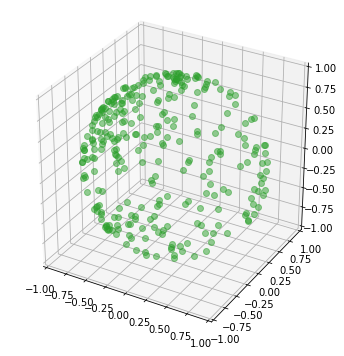

In [538]:
# import matplotlib.pyplot as plt 
import matplotlib.animation as animation
# from IPython.display import HTML
# import numpy as np

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.set_box_aspect((1,1,1))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

x = g1/g0
y = g2/g0
z = g3/g0
print(np.shape(x))
scat1, = ax.plot(x,y,z,alpha=0.5, lw=0, marker="o",color='tab:green')

def init():
    return scat1,

def animate(i):
    scat1.set_data((x[:i],y[:i]))
    scat1.set_3d_properties(z[:i])
    return scat1,
    

ani = animation.FuncAnimation(fig, animate, 300,
                                   interval=100, init_func=init, blit=True, repeat=True)
ani.save('class_3.mp4', writer="ffmpeg",dpi=100)

<ipython-input-347-ba4895ac88cd>:40: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-347-ba4895ac88cd>:81: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


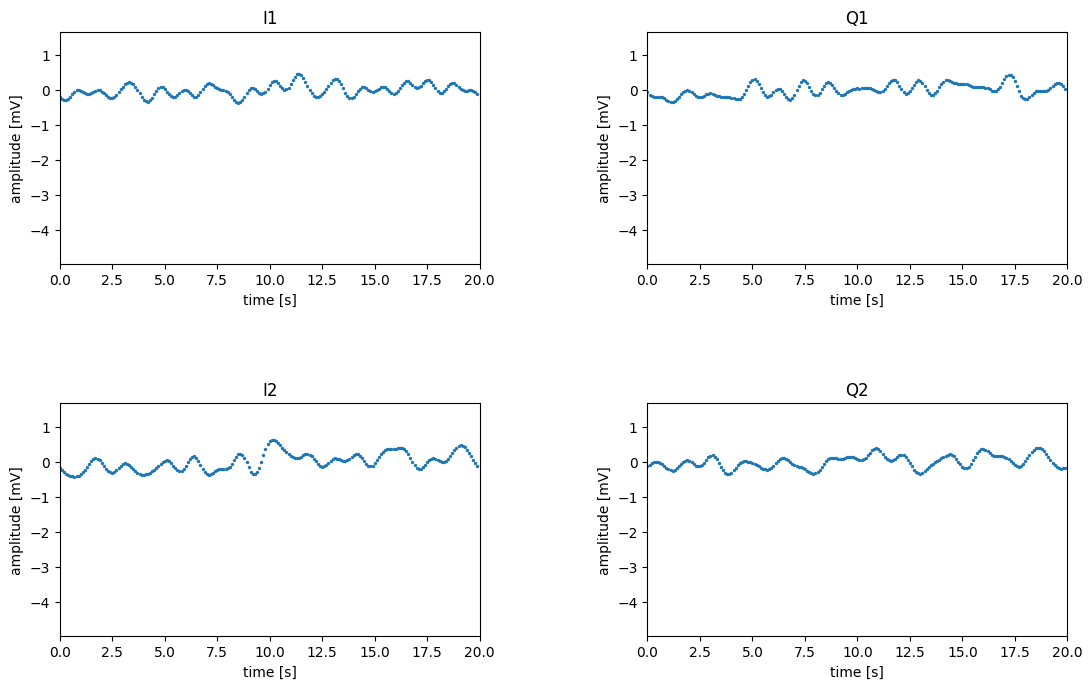

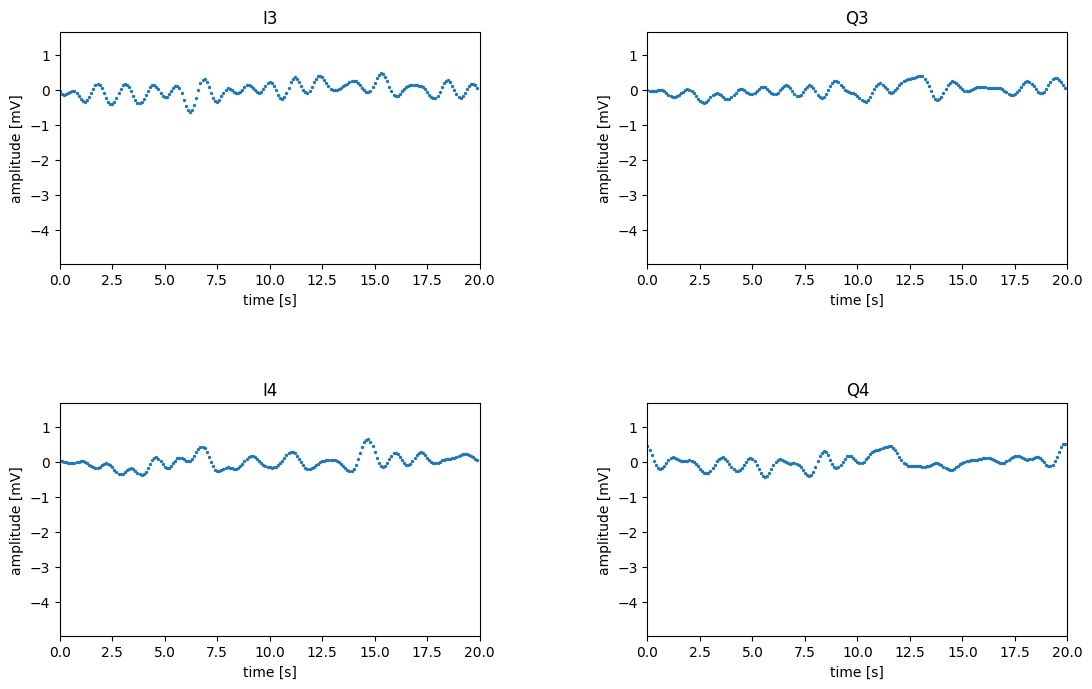

In [347]:
fig = plt.figure(figsize=(13, 8),dpi=100)  # Figureを設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)
#Tx1-Rx1
ax1 = fig.add_subplot(2, 2, 1)   #1行4列の1番目
mappable = ax1.scatter(t1, I1,s=2)
plt.title("I1",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx1-Rx2
ax2 = fig.add_subplot(2, 2, 2)   #1行4列の2番目
ax2.scatter(t1, Q1,s=2)
plt.title("Q1",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx2-Rx1
ax3 = fig.add_subplot(2, 2, 3)   #1行4列の3番目
ax3.scatter(t2, I2,s=2)
#fig.colorbar(mappable, ax=ax2 ) # カラーバーを付加
plt.title("I2",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx2-Rx2
ax4 = fig.add_subplot(2, 2, 4)   #1行4列の4番目
ax4.scatter(t2, Q2,s=2)
plt.title("Q2",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)
#plt.savefig("1.png")
plt.show()

fig = plt.figure(figsize=(13, 8),dpi=100)  # Figureを設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)
#Tx1-Rx1
ax1 = fig.add_subplot(2, 2, 1)   #1行4列の1番目
ax1.scatter(t1, I3,s=2)
#fig.colorbar(mappable, ax=ax1 ) # カラーバーを付加
plt.title("I3",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx1-Rx2
ax2 = fig.add_subplot(2, 2, 2)   #1行4列の2番目
ax2.scatter(t1, Q3,s=2)
plt.title("Q3",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx2-Rx1
ax3 = fig.add_subplot(2, 2, 3)   #1行4列の3番目
ax3.scatter(t2, I4,s=2)
plt.title("I4",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx2-Rx2
ax4 = fig.add_subplot(2, 2, 4)   #1行4列の4番目
ax4.scatter(t2, Q4,s=2)
plt.title("Q4",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)
#plt.savefig("2.png")
plt.show()

(-4.977697809776523, 1.6661898976403977)

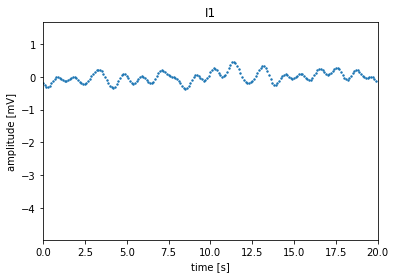

In [348]:
plt.scatter(t1, I1,s=2)
plt.title("I1",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

In [349]:
# from scipy import linalg

<ipython-input-526-623ad15ad826>:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(100, 10)


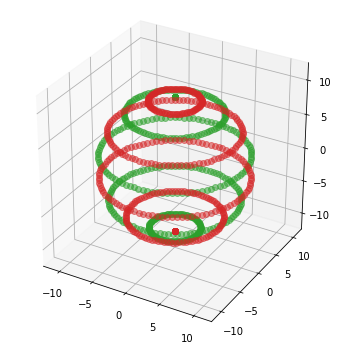

In [526]:
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.set_box_aspect((1,1,1))
ax.set_xlim(-12, 12)
ax.set_ylim(-12, 12)
ax.set_zlim(-12, 12) 
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 10)

x= 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
print(np.shape(x))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
scat1, = ax.plot(x[0,::2],y[0,::2],z[0,::2],alpha=0.5, lw=0, marker="o",color='tab:green')
scat2, = ax.plot(x[0,1::2],y[0,1::2],z[0,1::2],alpha=0.5, lw=0, marker="o",color='tab:red')
def init():
    return scat1, scat2, 

def animate(i):
    
    scat1.set_data((x[:i,::2].flatten(),y[:i,::2].flatten()))
    scat1.set_3d_properties(z[:i,::2].flatten())
    scat2.set_data((x[:i,1::2].flatten(),y[:i,1::2].flatten()))
    scat2.set_3d_properties(z[:i,1::2].flatten())
    return scat1, scat2, 
    

ani = animation.FuncAnimation(fig, animate, 100,
                                   interval=100, init_func=init, blit=True, repeat=True)
ani.save('class_3.mp4', writer="ffmpeg",dpi=100)
HTML(ani.to_html5_video())

In [351]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from quaternion_calculation import *
from qmodel import ESN, QGC
def to_quaternion(data):
    data_len = len(data)
    qdata = np.full(data_len, Variable(np.array([0,0,0,0])))
    for i in range(data_len):
        tmp = np.insert(data[i], 0, 0)
        qdata[i] = Variable(tmp)
    return qdata

In [475]:
QD1 = np.array([
to_quaternion([[1,-1,-1]]),to_quaternion([[-1,-1,-1]]),
to_quaternion([[-1,-1,-1]]),to_quaternion([[-1,-1,-1]]),
to_quaternion([[-1,-1,-1]]),to_quaternion([[-1,-1,-1]])
]*50)
QD2 = np.array([
to_quaternion([[-1,-1,-1]]),to_quaternion([[-1,1,-1]]),
to_quaternion([[-1,-1,-1]]),to_quaternion([[-1,-1,-1]]),
to_quaternion([[-1,-1,-1]]),to_quaternion([[-1,-1,-1]])
]*50)
QD3 = np.array([
to_quaternion([[-1,-1,-1]]),to_quaternion([[-1,-1,-1]]),
to_quaternion([[1,-1,-1]]),to_quaternion([[-1,-1,-1]]),
to_quaternion([[-1,-1,-1]]),to_quaternion([[-1,-1,-1]])
]*50)
QD1 =QD1.reshape(50,6)
QD2 =QD2.reshape(50,6)
QD3 =QD3.reshape(50,6)
QD = np.concatenate([QD1, QD2, QD3])
train_QD = QD[:,:150]
print(QD[:][40:60])

[[variable([ 0  1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])
  variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])]
 [variable([ 0  1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])
  variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])]
 [variable([ 0  1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])
  variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])]
 [variable([ 0  1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])
  variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])]
 [variable([ 0  1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])
  variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])]
 [variable([ 0  1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])
  variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])]
 [variable([ 0  1 -1 -1]) variable([ 0 -1 -1 -1]) variable([ 0 -1 -1 -1])
  variable([ 0 -1 -1 -1]) variab

In [480]:
qdata = np.array([
to_quaternion(np.array([g1/g0,g2/g0,g3/g0]).T),to_quaternion(np.array([h1/h0,h2/h0,h3/h0]).T),
to_quaternion(np.array([m1/m0,m2/m0,m3/m0]).T),to_quaternion(np.array([n1/n0,n2/n0,n3/n0]).T),
to_quaternion(np.array([l1/l0,l2/l0,l3/l0]).T),to_quaternion(np.array([r1/r0,r2/r0,r3/r0]).T)
]).T
train_QU = qdata[:T_train].T
train_QU.shape[1]

100

In [472]:
# Lorenz方程式から時系列データ生成
T_train = 100  # 学習データの長さ
T_test = 100  # テストデータの長さ
# dt = 0.02  # ステップ幅
# x0 = np.array([1, 0, 0])  # 初期値

# dynamics = Lorenz(10.0, 28.0, 8.0/3.0)
# data = dynamics.Runge_Kutta(x0, T_train + T_test, dt)
qdata = np.array([
to_quaternion(np.array([g1/g0,g2/g0,g3/g0]).T),to_quaternion(np.array([h1/h0,h2/h0,h3/h0]).T),
to_quaternion(np.array([m1/m0,m2/m0,m3/m0]).T),to_quaternion(np.array([n1/n0,n2/n0,n3/n0]).T),
to_quaternion(np.array([l1/l0,l2/l0,l3/l0]).T),to_quaternion(np.array([r1/r0,r2/r0,r3/r0]).T)
]).T

# 訓練・検証用情報
# train_U = data[:int(T_train/dt)]
train_QU = qdata[:T_train].T
# train_D = data[1:int(T_train/dt)+1]
train_QD = QD1[:,:T_train]

# test_U = data[int(T_train/dt):int((T_train+T_test)/dt)]
test_QU = qdata[T_train:].T
# test_D = data[1+int(T_train/dt):int((T_train+T_test)/dt)+1]
test_QD = QD1[:,T_train:]


# ESNモデル
N_x = 100  # リザバーのノード数
rho = 0.01
model = ESN(N_u=1, N_y=1, N_x=N_x,\
            density=0.1, input_scale=0.1, rho=rho)

# オンライン学習と予測
# print(train_QU)
# print(test_QU)
qtrain_Y = model.qadapt(train_QU, train_QD, QGC(N_x, 0.01))
# print(qtrain_Y)
train_Y = to_3Ddata(qtrain_Y)
# print(train_Y)
qtest_Y = model.qfree_run(test_QU)
test_Y = to_3Ddata(qtest_Y)

# print(x0)
# print("Node", N_x, "train_len", T_train)
train_error = 0
# for i in range(len(train_Y)-750, len(train_Y)):
    # for j in range(train_Y.shape[1]):
        # train_error += (train_Y[i][j] - train_D[i][j])**2

# print("train_error", (train_error/750)**0.5)
test_error = 0
# for i in range(len(test_Y)-1):
    # for j in range(test_Y.shape[1]):
        # test_error += (test_Y[i][j] - test_D[i][j])**2

# print("test_error", (test_error/(len(test_Y)-1))**0.5)

"""
# 予測性能評価（valid time）
eps = 1  # 許容誤差
for n in range(int(T_test/dt)):
    dif = np.sqrt(((test_D[n,:] - test_Y[n,:]) ** 2).mean())
    if dif > eps:
        valid_time = float(n)*dt
        break

print('valid time = ', valid_time)
"""
# グラフ表示用データ
T_disp = (-15, 15)
t_axis = np.arange(T_disp[0], T_disp[1], dt)  # 時間軸
# disp_D = np.concatenate((train_D[int(T_disp[0]/dt):], 
                        # test_D[:int(T_disp[1]/dt)]))  # 目標出力
disp_Y = np.concatenate((train_Y[int(T_disp[0]/dt):], 
                        test_Y[:int(T_disp[1]/dt)]))  # モデル出力

# グラフ表示
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(7, 7))
plt.subplots_adjust(hspace=0.3)

# ax1 = fig.add_subplot(3, 1, 1)
# ax1.text(-0.15, 1, '(a)', transform=ax1.transAxes)
# ax1.text(0.2, 1.05, 'Training', transform=ax1.transAxes)
# ax1.text(0.7, 1.05, 'Testing', transform=ax1.transAxes)
# plt.plot(t_axis, disp_D[:,0], color='k', label='Target')
# plt.plot(t_axis, disp_Y[:,0], color='gray', linestyle='--', label='Model')
# plt.ylabel('x')
# plt.axvline(x=0, ymin=0, ymax=1, color='k', linestyle=':')
# plt.legend(bbox_to_anchor=(0, 0), loc='lower left')

# ax2 = fig.add_subplot(3, 1, 2)
# ax2.text(-0.15, 1, '(b)', transform=ax2.transAxes)
# plt.plot(t_axis, disp_D[:,1], color='k', label='Target')
# plt.plot(t_axis, disp_Y[:,1], color='gray', linestyle='--', label='Model')
# plt.ylabel('y')
# plt.axvline(x=0, ymin=0, ymax=1, color='k', linestyle=':')
# plt.legend(bbox_to_anchor=(0, 0), loc='lower left')

# ax3 = fig.add_subplot(3, 1, 3)
# ax3.text(-0.15, 1, '(c)', transform=ax3.transAxes)
# plt.plot(t_axis, disp_D[:,2], color='k', label='Target')
# plt.plot(t_axis, disp_Y[:,2], color='gray', linestyle='--', label='Model')
# plt.ylabel('z')
# plt.xlabel('t')
# plt.axvline(x=0, ymin=0, ymax=1, color='k', linestyle=':')
# plt.legend(bbox_to_anchor=(0, 0), loc='lower left')

# #plt.savefig(f'out/result_tanh_{N_x}node_sp{rho}.png')
# plt.savefig(f'out/result.png')

ax1 = fig.add_subplot(3, 1, 1)
# ax1.text(-0.15, 1, '(a)', transform=ax1.transAxes)
# ax1.text(0.2, 1.05, 'Training', transform=ax1.transAxes)
# ax1.text(0.7, 1.05, 'Testing', transform=ax1.transAxes)
ax1.set_ylim(-25, 25)
ax1.set_yticks([-20, 0, 20])
# plt.plot(t_axis, disp_D[:,0], color='k', label='Target')
plt.plot(t_axis, disp_Y[:,0], color='gray', linestyle='--', label='Model')
# plt.ylabel('x')
plt.axvline(x=0, ymin=0, ymax=1, color='k', linestyle=':')
plt.legend(bbox_to_anchor=(0, 0), loc='lower left')

ax2 = fig.add_subplot(3, 1, 2)
# ax2.text(-0.15, 1, '(b)', transform=ax2.transAxes)
ax2.set_ylim(-25, 25)
ax2.set_yticks([-20, 0, 20])
# plt.plot(t_axis, disp_D[:,1], color='k', label='Target')
plt.plot(t_axis, disp_Y[:,1], color='gray', linestyle='--', label='Model')
# plt.ylabel('y')
plt.axvline(x=0, ymin=0, ymax=1, color='k', linestyle=':')
plt.legend(bbox_to_anchor=(0, 0), loc='lower left')

ax3 = fig.add_subplot(3, 1, 3)
# ax3.text(-0.15, 1, '(c)', transform=ax3.transAxes)
ax3.set_ylim(-3, 50)
ax3.set_yticks([0, 20, 40])
# plt.plot(t_axis, disp_D[:,2], color='k', label='Target')
plt.plot(t_axis, disp_Y[:,2], color='gray', linestyle='--', label='Model')
# plt.ylabel('z')
plt.xlabel('Time t', fontsize=20)
plt.axvline(x=0, ymin=0, ymax=1, color='k', linestyle=':')
plt.legend(bbox_to_anchor=(0, 0), loc='lower left')

# plt.savefig(f'out/result_Node{N_x}.png')
# plt.savefig(f'out/result.png')

# fig2 = plt.figure()
# ax = fig2.add_subplot(111, projection='3d')
# ax.set_xlabel("x", size = 14)
# ax.set_ylabel("y", size = 14)
# ax.set_zlabel("z", size = 14)

# # 軸目盛を設定
# # ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
# # ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
# ax.plot(disp_D[:,0], disp_D[:,1], disp_D[:,2], color="red", linewidth=0.5, label='Target')
# ax.plot(disp_Y[:,0], disp_Y[:,1], disp_Y[:,2], color="blue", linewidth=0.5, label='Model')
# plt.savefig(f'3d/qrc{N_x}.png')


6
0.0  is done


TypeError: float() argument must be a string or a number, not 'Variable'

[variable([0.         0.86801362 0.51161143 0.00464843])
 variable([0.         0.84692203 0.97216247 0.01672375])
 variable([0.         0.91274632 1.43659307 0.03638911]) ...
 variable([ 0.          5.78358426  9.19324156 16.32724195])
 variable([ 0.          6.5143483  10.41334544 16.65341736])
 variable([ 0.          7.34262392 11.72197138 17.28280303])]


In [ ]:
x0 = np.array([0, 0, 0, 0], np.single)
w_abs = (qdata[0][0].data[0]**2 + qdata[0][0].data[1]**2 
+ qdata[0][0].data[2]**2 + qdata[0][0].data[3]**2)**0.5
w_abs

0.9999999999999999

In [ ]:
from qmodel import *
x_in = Input(1,100,1)
x_in.Win

array([variable([0.         0.43037873 0.20552675 0.08976637]),
       variable([ 0.          0.29178823 -0.12482558  0.783546  ]),
       variable([ 0.         -0.23311696  0.58345008  0.05778984]),
       variable([ 0.          0.85119328 -0.85792788 -0.8257414 ]),
       variable([0.         0.66523969 0.5563135  0.7400243 ]),
       variable([ 0.          0.59831713 -0.07704128  0.56105835]),
       variable([ 0.          0.27984204 -0.71329343  0.88933783]),
       variable([ 0.         -0.17067612 -0.47088878  0.54846738]),
       variable([ 0.          0.1368679  -0.9624204   0.23527099]),
       variable([0.         0.23386799 0.88749616 0.3636406 ]),
       variable([ 0.         -0.12593609  0.39526239 -0.87954906]),
       variable([ 0.          0.34127574 -0.57923488 -0.7421474 ]),
       variable([ 0.         -0.27257846  0.14039354 -0.12279697]),
       variable([ 0.         -0.79591038 -0.58224649 -0.67738096]),
       variable([ 0.         -0.49341679 -0.06737845 -0.5111

In [500]:
d

array([variable([0. 2. 0. 0.]), variable([ 0.  0. -2.  0.]),
       variable([0. 0. 0. 0.]), variable([0. 0. 0. 0.]),
       variable([0. 0. 0. 0.]), variable([0. 0. 0. 0.])], dtype=object)

In [511]:
d = (QD1-QD2)[0]
np.exp(-absolute_value(d[0]).data)

0.13533528

(402, 5)

In [523]:
df

array([[-25.63476562, -29.34570312, -25.78125   , -30.22460938,
         -0.34179688],
       [-25.73242188, -29.24804688, -25.24414062, -29.8828125 ,
         65.4296875 ],
       [-25.43945312, -29.19921875, -25.73242188, -30.2734375 ,
         -0.390625  ],
       ...,
       [-24.90234375, -29.19921875, -25.390625  , -29.98046875,
         65.4296875 ],
       [-25.29296875, -28.95507812, -25.34179688, -30.02929688,
         -0.390625  ],
       [-26.171875  , -29.34570312, -25.5859375 , -29.93164062,
         -7.17773438]])

In [536]:
a = [QD[0][0],QD[0][1]]

AttributeError: 'list' object has no attribute 'shape'

In [74]:
(train_output[0]+train_output[1])**2

array([[0., 0., 4., 0.],
       [0., 0., 4., 0.],
       [0., 0., 4., 0.],
       [0., 0., 4., 0.],
       [0., 0., 4., 0.],
       [0., 0., 4., 0.]])

In [75]:
train_output = np.empty((0, 6, 4))
tmp = np.zeros((10, 6, 4))
tmp[:, :, 2] = 1  # labelの列のみ1
train_output = np.vstack((train_output, tmp))
train_output

array([[[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],


In [47]:
train_length = np.empty(0, np.int)
for i in range(5):
    train_length = np.hstack((train_length, 200))
train_length

array([200, 200, 200, 200, 200])

In [414]:
W = np.random.uniform(-0.1, 0.1, (6, 6,4))
x = np.random.uniform(-0.1, 0.1, (6,4))
outer_product_array(outer_product_array(W[0],x),conjugation_array(W[0]))/norm_array(W[0])

array([[ 0.002939  ,  0.00447402, -0.00609462,  0.00386021],
       [ 0.00530723,  0.0109912 ,  0.00506006, -0.00357559],
       [ 0.00055568, -0.00302761,  0.00124554,  0.01265002],
       [-0.00049771,  0.00535895, -0.00305379,  0.0058498 ],
       [-0.00177281, -0.0074138 ,  0.00535166,  0.00619666],
       [ 0.0002884 ,  0.00608885,  0.0018575 , -0.00702571]])

In [415]:
print(W.shape,x.shape)
outer_product(W[0][1],x[1])

(6, 6, 4) (6, 4)


[0.01165949120240404,
 0.0005583062089194279,
 0.006874135746102653,
 0.001962891973027398]

In [416]:
print(inner_product_array(W,x))
print(inner_product(W[0],x[0]))

array([[ 0.00104781, -0.00182947, -0.00346162,  0.00598766],
       [ 0.00235237,  0.00828994, -0.01387333, -0.01573066],
       [-0.00013204,  0.01214774,  0.00278173, -0.00279171],
       [-0.00436364,  0.01103618,  0.0017374 , -0.01605643],
       [ 0.00127978,  0.02398858,  0.00911043,  0.00061607],
       [ 0.00230421, -0.02099821, -0.0055847 ,  0.00263919]])

In [236]:
def outer_product(a, b):
    res = [0]*4
    res[0] = a[0]*b[0]-a[1]*b[1]-a[2]*b[2]-a[3]*b[3]
    res[1] = a[0]*b[1]+a[1]*b[0]+a[2]*b[3]-a[3]*b[2]
    res[2] = a[0]*b[2]+a[2]*b[0]+a[3]*b[1]-a[1]*b[3]
    res[3] = a[0]*b[3]+a[3]*b[0]+a[1]*b[2]-a[2]*b[1]
    return res
def inner_product_array(a,b):
    return np.sum(a*b,axis=1)

def outer_product_array(a,b):
    return list(map(outer_product, a, b))

def norm_array(a):
    return np.linalg.norm(a,axis=1).reshape(a.shape[0],1)

def conjugation_array(a):
    for i in range(len(a)):
        a[i,1]*= -1
        a[i,2]*= -1
        a[i,3]*= -1
    return a

In [237]:
print(np.linalg.norm(x,axis=1).reshape(x.shape[0],1))

[[0.09097534]
 [0.08549503]
 [0.08933843]
 [0.10621631]
 [0.09923245]
 [0.14441765]]


In [238]:
x/norm_array(x)

array([[ 0.73908566, -0.51752455, -0.35109539, -0.25030532],
       [ 0.83872927,  0.03854442, -0.08808721,  0.53599271],
       [ 0.86142001, -0.1627884 ,  0.47344572,  0.08546725],
       [ 0.40473766, -0.88243521, -0.23329586, -0.05539473],
       [ 0.7672168 ,  0.60157985, -0.0104198 , -0.22219696],
       [ 0.09033516,  0.63545726, -0.61974025,  0.45161449]])

In [239]:
np.sum(x/norm_array(x),axis = 0)

array([ 3.70152455, -0.28716662, -0.82919279,  0.54517743])

In [240]:
def rot(W,x):
    s = np.empty((0,4))
    for i in range(len(W)):
        tmp = outer_product_array(outer_product_array(W[i],x),conjugation_array(W[i]))/norm_array(W[i])
        s = np.vstack((s, np.sum(tmp,axis=0)))
    return s
rot(W,x)

array([[ 0.04091057, -0.01882005,  0.00331841, -0.01758718],
       [ 0.03726889, -0.00329094,  0.00558679, -0.00160179],
       [ 0.04107293,  0.00393826, -0.00028977, -0.0070827 ],
       [ 0.04090855, -0.00513228, -0.01198173, -0.00760276],
       [ 0.0354333 , -0.01903815, -0.00210692,  0.00265321],
       [ 0.03974196,  0.00345215,  0.02326351, -0.00947032],
       [ 0.03749599, -0.01039476,  0.01066255, -0.00099456],
       [ 0.04739735, -0.00370368, -0.00247596, -0.00145582],
       [ 0.04047226, -0.00682696,  0.0037482 , -0.01962377],
       [ 0.03180933, -0.00444666, -0.02583405,  0.01430313]])

In [241]:
np.tanh(x/norm_array(x))

array([[ 0.62859242, -0.47578719, -0.33734664, -0.24520565],
       [ 0.68513541,  0.03852534, -0.08786008,  0.48994861],
       [ 0.69698857, -0.16136551,  0.44097919,  0.08525975],
       [ 0.38399537, -0.70763719, -0.22915349, -0.05533814],
       [ 0.64530815,  0.5381728 , -0.01041942, -0.21861103],
       [ 0.09009023,  0.56179852, -0.55094715,  0.42322522]])

In [242]:
np.arange(0, 100, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [410]:
x

array([[ 0.        ,  0.36135436, -0.25944265, ...,  0.96871298,
         0.20436486,  0.14081963],
       [ 0.        ,  0.40168471, -0.16883166, ...,  0.96899733,
        -0.21133228,  0.12799547],
       [ 0.        ,  0.51714628, -0.10892372, ...,  0.53201225,
        -0.76831777,  0.35588029],
       ...,
       [ 0.        ,  0.53525344, -0.40666974, ...,  0.9337568 ,
         0.28435062, -0.21735445],
       [ 0.        ,  0.40636421, -0.34961227, ...,  0.91056489,
         0.41171214, -0.0369418 ],
       [ 0.        ,  0.3567482 , -0.31957288, ...,  0.91908366,
         0.38317301,  0.09199817]])

In [244]:
norm_array(x)

array([[0.09097534],
       [0.08549503],
       [0.08933843],
       [0.10621631],
       [0.09923245],
       [0.14441765]])

In [250]:
norm_array(W)

ValueError: cannot reshape array of size 40 into shape (10,1)

In [371]:
W[0].shape

(6, 4)

In [247]:
type(x)

numpy.ndarray

In [248]:
W[0].shape

(6, 4)

In [249]:
for i in range(len(x)):
    print(norm_array(W[0])[i] == np.linalg.norm(W[0,i]), norm_array(W[0])[i], np.linalg.norm(W[0,i]))

[ True] [0.13071733] 0.13071733486575146
[ True] [0.07914012] 0.07914012402027867
[ True] [0.13674812] 0.13674811567122827
[ True] [0.15982824] 0.15982824235576168
[ True] [0.09806334] 0.09806333822261101
[ True] [0.12155057] 0.12155057422733187


In [233]:
W[0,0]

array([-0.02679541,  0.07303846, -0.06823884, -0.07986157])

In [235]:
x[0].shape

(4,)

In [358]:
import pandas as pd
def modify(a):
    return list(map(float,a[1:-1].split(',')))

df = pd.read_csv("../test.csv",header=None)
df = df.applymap(modify)
a = np.array(df)

In [359]:
a[0,0]

[0.0, 0.16843546608911728, -0.9173376941927549, 0.3607229526609874]

In [360]:
x  = np.ndarray((np.shape(df)[0], np.shape(df)[1], 4))
for i in range(np.shape(df)[0]):
    for j in range(np.shape(df)[1]):
        for k in range(4):
            x[i,j,k]=a[i,j][k]

In [366]:
train_input = np.empty((0, 6, 4))
np.vstack((train_input, x)).shape

(200, 6, 4)

In [374]:
z = np.zeros([1, 6, 4])
z

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [375]:
z[0]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [376]:
z[:,0]

array([[0., 0., 0., 0.]])

In [405]:
a = [3,2,1,0]
np.argmax(a[1:])
df.iloc[0:2,:]

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0.361354,-0.259443,0.895607,0,0.710742,-0.391003,-0.584776,0,0.796611,...,0.745197,-0.402500,0,0.035669,-0.999309,0.010483,0,0.968713,0.204365,0.140820
1,0,0.401685,-0.168832,0.900081,0,0.387499,-0.907467,-0.162323,0,0.551495,...,0.541607,-0.389298,0,-0.091494,-0.819417,0.565849,0,0.968997,-0.211332,0.127995


In [407]:
df = pd.read_csv("../data/test.csv",header=None)
x = np.array(df)
x.reshape(200,6,4).shape


(200, 6, 4)

In [417]:
def conjugation(a):
    a[1]*= -1
    a[2]*= -1
    a[3]*= -1
    return a

In [419]:
from scipy import linalg

In [409]:
def BQAM(W, x, k, sigma): # Basic Quaternion Arnoldi Method
    Q = np.zeros((k, k))
    Q_conj = np.zeros((k, k))
    H = np.zeros((k+1,k))
    q = x/norm_array(x)
    Q.append(q)
    for j in range(k):
        r = inner_product_array(W,Q[j])
        for i in range(j):
            H[i,j] = np.sum(conjugation(Q[i])*r)
            r = r - Q[i] * H[i,j]
        H[j+1,j] = norm_array(r)
        Q[j+1] = r/H[j+1,j]
        if j - np.trace(np.dot(conjugation_array(Q[:j]), Q[:j])) > sigma:
            r = r - np.dot(np.dot(Q[:j-2],conjugation_array(Q[:j-2])),r)
        Q[j+1] = r/H[j+1,j]
        if H[j+1,j] == 0:
            break
    S, U = linalg.schur(H[:k])
    return S

def RE_of_NSform(S, k):
    Z = np.zeros((k, k))
    Lambda = np.zeros(k)
    Z[0,0] = 1
    Lambda[0] = S[0,0]
    for i in range(1,k):
        Lambda[i] = S[i,i]

array([[[-4.64195714e-02, -4.39861557e-02,  3.74998835e-03,
          8.07311811e-02],
        [-9.34469504e-02, -5.74809101e-02, -6.37591333e-02,
         -2.55461393e-02],
        [-4.74153838e-02,  3.46701276e-02,  6.03640924e-02,
         -3.12664278e-02],
        [-5.70623597e-02,  8.99523289e-02,  4.38809765e-02,
          7.96440533e-02],
        [ 6.74812920e-02,  8.06153523e-03,  2.77783340e-02,
         -4.00746455e-02],
        [ 8.33371487e-02, -1.00774941e-02, -2.49156455e-03,
          1.98261432e-02]],

       [[-5.26658234e-02,  7.25741660e-02,  2.83469468e-02,
          9.82374548e-02],
        [ 2.61184348e-02,  8.64090125e-02, -9.83641560e-02,
          5.99524455e-02],
        [-4.67580174e-03,  6.87167676e-03,  3.23198431e-02,
          5.51853310e-02],
        [ 2.08459945e-02,  9.58824127e-02, -4.35326615e-02,
         -9.07222035e-05],
        [ 7.91869645e-02,  6.58557539e-02,  1.33040623e-03,
          6.94855570e-02],
        [ 1.32769771e-02,  3.79375760e-02

In [447]:
x[0][0]

0.0285373279477851

In [458]:
a = np.zeros((10,10))
b = np.zeros((10,10,4))
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        b[i,j] = a[i,j]*4
print(a, b)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0.

In [462]:
print(x)
print(norm_array(x))
np.linalg.norm(x[0])

[[ 0.02853733  0.04384133  0.06145253  0.03310171]
 [ 0.04062811  0.05908482  0.07597424  0.00813504]
 [ 0.00593944  0.08622754  0.08474831  0.06992389]
 [-0.00616469 -0.06288996 -0.01028241 -0.08381939]
 [-0.01855706 -0.09488426 -0.0412606   0.0516002 ]
 [ 0.00356393 -0.09792837  0.06099386 -0.02040894]]
[[0.08722716]
 [0.10478513]
 [0.13979303]
 [0.10547307]
 [0.11709998]
 [0.11721537]]


0.08722715918594315

In [463]:
a = [[3,0,0],[0,4,0],[0,0,5]]
np.linalg.norm(a)

7.0710678118654755

In [464]:
np.sqrt(2)*5

7.0710678118654755

In [472]:
def BQAM(W, x, k, sigma): # Basic Quaternion Arnoldi Method
    Q = np.zeros((k+1, k, 4))
    H = np.zeros((k+1,k,4))
    q = x/np.linalg.norm(x)
    Q[0] = q
    r = np.zeros((k,4))
    for j in range(k):
        for i in range(k):
            for n in range(k):
                r[i] += outer_product(W[i,n], Q[j,n])
        for i in range(j):
            for n in range(k):
                H[i,j] += outer_product(conjugation(Q[i,n]),r[n])
                r[n] = r[n] - outer_product(Q[i,n], H[i,j])
        H[j+1,j] = [np.linalg.norm(norm_array(r)),0,0,0]
        Q[j+1] = r/H[j+1,j]
        x = np.zeros((j, j, 4))
        for col in range(j):
            for row in range(j):
                for nth in range(k):
                    x[col,row] += outer_product(conjugation(Q[col,nth]),Q[row,nth])
                x[col,row] = np.linalg.norm(x[col,row])
        x_norm = np.linalg.norm(x)
        if j+1 - x_norm > sigma:
            tmp1 = np.zeros((k,4))
            tmp2 = np.zeros((k,4))
            for i in range(j-1):
                for n in range(k):
                    tmp1[i] += outer_product(conjugation(Q[i,n]),r[n])
                    tmp2[n] += outer_product(Q[i,n], tmp1[i])
            r = r - tmp2
        Q[j+1] = r/H[j+1,j,0]
        if H[j+1,j,0] == 0:
            break
    H_new = np.zeros((k, k, 4))
    for col in range(k):
        for row in range(k):
            for nth in range(k+1):
                H_new[col,row] += outer_product(Q[nth,col],H[nth,row])
    H_new2 = np.zeros((k, k, 4))
    for col in range(k):
        for row in range(k):
            for nth in range(k):
                H_new2[col,row] += outer_product(conjugation(Q[col,nth]),H[row,nth])
    return H_new2

In [477]:
k=6
x = np.ones((k,4))
W = np.ones((10,10,4))
H = BQAM(W, x, k, 1e-2)
H

<ipython-input-472-9a823d69f2a4>:16: RuntimeWarning: divide by zero encountered in true_divide
  Q[j+1] = r/H[j+1,j]


array([[[ -41.77429278,   11.02607502,   11.02607502,   11.02607502],
        [  38.78108073,    6.76729213,    6.76729213,    6.76729213],
        [ 106.79785507,  -58.66239449,  -58.66239449,  -58.66239449],
        [  22.05633172,   28.48085545,   28.48085545,   28.48085545],
        [  17.46291746,  -15.00548323,  -15.00548323,  -15.00548323],
        [  11.41397765,   11.41397765,   11.41397765,   11.41397765]],

       [[  -4.34803387,   26.4001839 ,   26.4001839 ,   26.4001839 ],
        [   9.23960217,   22.77418643,   22.77418643,   22.77418643],
        [ -34.5946642 ,  -82.73012478,  -82.73012478,  -82.73012478],
        [ -31.69311731,   25.26859358,   25.26859358,   25.26859358],
        [ -13.77676612,  -16.23420035,  -16.23420035,  -16.23420035],
        [ -11.41397765,   11.41397765,   11.41397765,   11.41397765]],

       [[  41.40928836,   16.2419272 ,   16.2419272 ,   16.2419272 ],
        [ -31.07302085,   14.37907025,   14.37907025,   14.37907025],
        [-156.25

In [2]:
import numpy as np
histogram = np.bincount(2)

ValueError: object of too small depth for desired array